# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 1
Python-dotenv could not parse statement starting at line 22
Python-dotenv could not parse statement starting at line 24
Python-dotenv could not parse statement starting at line 26
Python-dotenv could not parse statement starting at line 40
Python-dotenv could not parse statement starting at line 41
Python-dotenv could not parse statement starting at line 42
Python-dotenv could not parse statement starting at line 43


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 2.0

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_content = btc_data

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_content = eth_data

# Compute current value of my crpto
my_btc_value = btc_content['data']['1']['quotes']['USD']['price'] * my_btc
my_eth_value = eth_content['data']['1027']['quotes']['USD']['price'] * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47122.80
The current value of your 2.0 ETH is $5303.04


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [30]:
# Current amount of shares
my_agg = 200
my_spy = 500

In [31]:
# Set Alpaca API key and secret
api_key = os.getenv("API_Key_ID")
secret_key = os.getenv("Alpaca_Secret_Key")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    api_key,
    secret_key,
    api_version="v2")

In [32]:
type(secret_key)

str

In [33]:
# Set timeframe to daily for Alpaca API
timeframe = "1D"

# Format current date as ISO format
start_date = pd.Timestamp("2021-05-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-02-20", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Get current closing prices for SPY and AGG
agg_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
spy_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Preview DataFrame(s)
agg_data.head()
spy_data.tail()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2022-02-14 00:00:00-05:00  109.66  109.7600  109.4000  109.475  7654991   
2022-02-15 00:00:00-05:00  109.36  109.5100  109.2400  109.260  5373433   
2022-02-16 00:00:00-05:00  109.44  109.4849  109.1000  109.410  7923730   
2022-02-17 00:00:00-05:00  109.58  109.8050  109.5146  109.660  8993478   
2022-02-18 00:00:00-05:00  109.83  109.8800  109.7100  109.870  6661493   

                              SPY                                       
                             open      high     low   close     volume  
time                                                                    
2022-02-14 00:00:00-05:00  439.92  441.6000  435.34  439.05  104540969  
2022-02-15 00:00:00-05:00  443.73  446.2800  443.18  446.08   75183610  
2022-02-16 00:00:00-05:00  443.93  448.0550  441.94  446.64   71725157  
2022-02-17 00:00:00-05:00  443.22  446.5652  436.42  437.11   86160205  
2022-02-18 00:00:00-05:00  437.33  438.6600  431.82  434.25  108192005

In [34]:
# Pick AGG and SPY close prices
agg_close_price = agg_data["AGG"]["close"]["2022-02-18 00:00:00-05:00"]
spy_close_price = spy_data["SPY"]["close"]["2022-02-18 00:00:00-05:00"]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $109.87
Current SPY closing price: $434.25


In [35]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 500 SPY shares is $217125.00
The current value of your 200 AGG shares is $21974.00


### Savings Health Analysis

In [36]:
# Set monthly household income
monthly_income = 12000

# Switch this to have each column for the total in crypto & formal assets
# Use a list 
savings_data = [
    [my_btc_value + my_eth_value],
    [my_agg_value + my_spy_value]
]

# Create savings DataFrame
df_savings = pd.DataFrame(savings_data, columns=["Total saved"],index=["Crypto","Shares"])

# Display savings DataFrame
display(df_savings)

,Total saved
Crypto,52425.84
Shares,239099.00


array([<AxesSubplot:ylabel='Total saved'>], dtype=object)

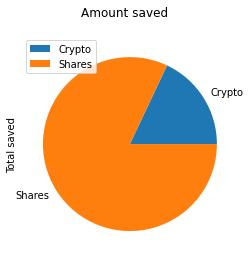

In [37]:
# Plot savings pie chart
df_savings.plot.pie(title = "Amount saved", subplots=True)# Needs to be one column w/ the amount of rows needed

In [38]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)
# Calculate total amount of savings
# YOUR CODE HERE!
savings = my_btc_value + my_eth_value + my_spy_value + my_agg_value
print(savings)
# Validate saving health
# YOUR CODE HERE!
if (savings > emergency_fund):
    print("Congrats for having enough!")
elif (savings == emergency_fund):
    print("Congrats for reaching this goal!")
elif (savings < emergency_fund):
    print(f"You still need {emergency_fund - savings} until the goal is met." )

36000
291524.83999999997
Congrats for having enough!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-18', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG", "SPY"]
timeframe = "1D"
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=500
).df
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                              SPY                                       
                             open    high      low   close      volume  
time                                                                    
2019-05-23 00:00:00-04:00     NaN     NaN      NaN     NaN         NaN  
2019-05-24 00:00:00-04:00  283.74  284.20  282.090  282.80  44877163.0  
2019-05-28 00:00:00-04:00  283.09  284.15  280.180  280.31  57121638.0  
2019-05-29 00:00:00-04:00  278.91  279.36  276.710  278.38  88121995.0  
2019-05-30 00:00:00-04:00  279.11  280.04  277.805  279.05  52483275.0

In [52]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# df_ticker is df_stock_data here
sim_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation=500,
    num_trading_days=252*30
)

sim_returns.portfolio_data.head() # Checking the simulation input data

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-05-23 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2019-05-24 00:00:00-04:00     0.000366  283.74  284.20  282.090  282.80   
2019-05-28 00:00:00-04:00     0.001462  283.09  284.15  280.180  280.31   
2019-05-29 00:00:00-04:00     0.000274  278.91  279.36  276.710  278.38   
2019-05-30 00:00:00-04:00     0.002555  279.11  280.04  277.805  279.05   

                                                    
                               volume daily_return  
time                                                
2019-05-23 00:00:00-04:00         NaN          NaN  
2019-05-24 00:00:00-04:00  44877163.0          NaN  
2019-05-28 00:00:00-04:00  57121638.0    -0.008805  
2019-05-29 00:00:00-04:00  88121995.0    -0.006885  
2019-05-30 00:00:00-04:00  52483275.0     0.002407

In [44]:
sim_returns.calc_cumulative_return() # Forecast 30 years of cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007882,0.995672,0.997323,0.994257,0.990111,1.002832,0.994514,0.995028,0.985955,0.995849,...,1.001902,1.000321,0.993634,1.018878,0.998251,1.005497,1.015884,1.007022,1.002729,1.001223
2,1.023045,0.983668,1.002632,0.989738,0.984500,0.999429,0.995607,1.013273,1.008709,1.001328,...,1.003635,1.005809,0.985377,1.018488,0.988572,1.010775,1.039083,1.011122,0.993449,0.988823
3,1.008662,1.014171,1.011807,0.989179,0.976623,0.994417,1.001060,1.010910,1.022746,1.018218,...,1.000215,0.996443,0.986823,1.017607,0.984278,1.015299,1.030829,1.016967,0.981028,1.008551
4,1.014616,1.011829,1.012546,0.987110,0.984898,1.005460,1.012765,1.024841,1.034402,1.025344,...,0.993326,1.005223,0.997588,1.020095,0.985745,1.019862,1.026007,1.024448,0.976324,1.019705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,81.215893,84.353747,169.714139,51.889786,36.666339,71.755191,27.569142,48.609856,21.353384,65.082801,...,38.361963,15.851766,44.389377,46.024605,40.920141,31.404611,48.350238,62.320070,30.584739,60.979355
7557,80.025225,84.332993,169.845956,51.662820,36.714229,71.251466,27.759970,48.988269,21.341441,65.587095,...,37.828226,15.788034,44.238732,45.943799,41.140592,32.010479,48.500607,62.338101,30.900074,60.293978
7558,81.321152,83.904005,170.879118,51.618602,36.359418,70.833463,28.053050,48.742843,21.189792,65.238537,...,37.627598,16.109000,44.740668,45.998393,40.479407,32.130636,48.730431,62.275266,30.243191,60.712463
7559,80.363332,84.527832,170.027303,50.559497,36.928180,70.283383,28.204253,49.471098,21.353737,65.930751,...,37.754706,15.953616,44.185750,46.331672,40.720185,31.707997,48.283246,62.066203,30.227472,61.102107


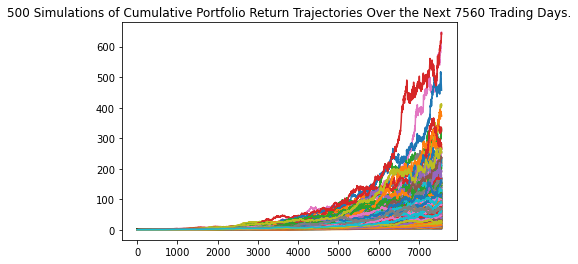

In [45]:
plots = sim_returns.plot_simulation() # To depict an image with simulation outcomes

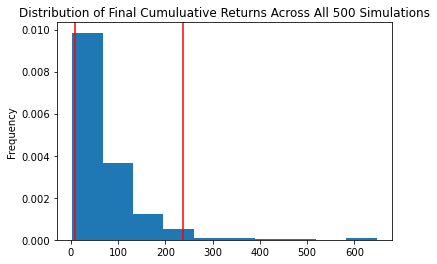

In [46]:
dist_plot = sim_returns.plot_distribution() # Plot probability distribution and confidence intervals

### Retirement Analysis

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
all_stats = sim_returns.summarize_cumulative_return()

print(all_stats)

count           500.000000
mean             71.737196
std              71.585018
min               2.871618
25%              28.477030
50%              49.719688
75%              91.365106
max             646.658333
95% CI Lower      9.373609
95% CI Upper    236.714108
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [48]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
port_high_return = round(initial_investment * all_stats[9],2) 
port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${port_low_return} and ${port_high_return}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $187472.18 and $4734282.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [58]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(initial_investment * all_stats[8],2)
ci_upper = round(initial_investment * all_stats[9],2) 

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $281208.28 and $7101423.24


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [51]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
riskier_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=100,
    num_trading_days=252*5
)
riskier_returns.portfolio_data.head() # For a forecast amounting to 5 years of cumulative returns

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-05-23 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2019-05-24 00:00:00-04:00     0.000366  283.74  284.20  282.090  282.80   
2019-05-28 00:00:00-04:00     0.001462  283.09  284.15  280.180  280.31   
2019-05-29 00:00:00-04:00     0.000274  278.91  279.36  276.710  278.38   
2019-05-30 00:00:00-04:00     0.002555  279.11  280.04  277.805  279.05   

                                                    
                               volume daily_return  
time                                                
2019-05-23 00:00:00-04:00         NaN          NaN  
2019-05-24 00:00:00-04:00  44877163.0          NaN  
2019-05-28 00:00:00-04:00  57121638.0    -0.008805  
2019-05-29 00:00:00-04:00  88121995.0    -0.006885  
2019-05-30 00:00:00-04:00  52483275.0     0.002407

In [53]:
riskier_returns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998546,1.016882,1.008144,0.992386,0.993829,0.991026,0.991138,0.998802,1.007178,1.004837,...,0.998865,1.013164,0.984318,0.985289,1.016341,1.002308,0.989643,0.997942,1.020879,0.983078
2,0.994698,1.039872,1.018678,1.002178,0.994737,0.978000,0.996897,0.987715,1.003711,1.002049,...,1.029662,1.023133,0.980466,0.978899,1.016212,0.976550,1.003306,1.010070,1.031977,1.001044
3,1.003619,1.008616,1.034291,0.990787,0.984110,0.979618,0.989552,0.975011,1.000976,0.995719,...,1.016255,1.028004,0.989587,0.978106,0.987183,0.990705,1.017727,1.016327,1.031755,0.985947
4,0.990611,1.011916,1.055527,0.989416,0.997307,0.949522,0.969296,0.991292,1.012052,0.994021,...,1.039611,1.007403,0.968544,0.976691,0.983556,0.989462,1.018965,1.017616,1.037929,1.006114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.921555,3.538756,1.838082,0.944324,1.896392,1.475279,2.072412,1.632175,2.897420,4.287815,...,4.591936,2.782029,1.556923,2.466623,2.838431,1.874599,1.799746,1.557204,11.148649,1.241548
1257,1.883628,3.600828,1.822120,0.938986,1.881731,1.463434,2.082350,1.643211,2.871083,4.317513,...,4.563143,2.716488,1.544366,2.475866,2.835073,1.908387,1.827193,1.554799,11.049588,1.252397
1258,1.888332,3.630327,1.827527,0.942298,1.838207,1.479431,2.074021,1.642150,2.933369,4.381974,...,4.588022,2.721395,1.554925,2.439480,2.764104,1.952264,1.834521,1.577208,11.039372,1.263121
1259,1.834865,3.676867,1.834910,0.947736,1.858365,1.500325,2.062501,1.633835,2.879038,4.355662,...,4.573072,2.716331,1.564183,2.503699,2.782305,1.880713,1.863667,1.624920,10.938805,1.250653


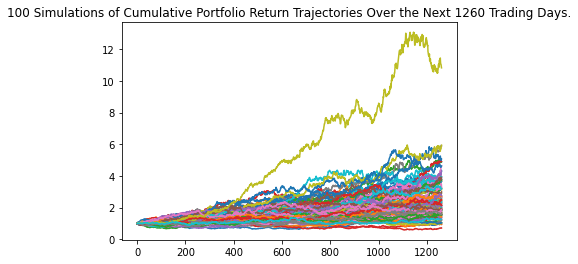

In [54]:
# Plot simulation outcomes
riskier_plots = riskier_returns.plot_simulation()

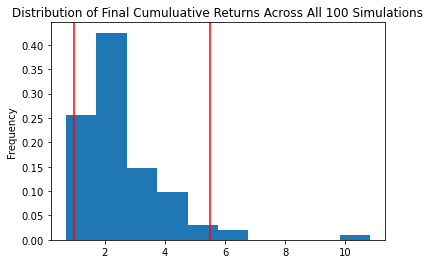

In [55]:
risky_distribution_plot = riskier_returns.plot_distribution() # Plot probability distribution and confidence intervals

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
risky_stats = riskier_returns.summarize_cumulative_return()

print(risky_stats)

count           100.000000
mean              2.557717
std               1.392215
min               0.708709
25%               1.694157
50%               2.148719
75%               3.176661
max              10.826029
95% CI Lower      0.989999
95% CI Upper      5.499416
Name: 1260, dtype: float64


In [61]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
risky_port_high_return = round(initial_investment * all_stats[9],2) 
risky_port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${risky_port_low_return} and ${risky_port_high_return}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $562416.55 and $14202846.48


In [65]:
# 10 years of cumulative returns 
ten_Yr_returns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation=300,
    num_trading_days=252*10
)
ten_Yr_returns.portfolio_data.head() 

AGG                                       \
                             open      high     low   close     volume   
time                                                                     
2019-05-23 00:00:00-04:00  109.18  109.5000  109.14  109.38  4501018.0   
2019-05-24 00:00:00-04:00  109.37  109.4499  109.33  109.42  1778069.0   
2019-05-28 00:00:00-04:00  109.57  109.6500  109.50  109.58  4744701.0   
2019-05-29 00:00:00-04:00  109.73  109.8500  109.60  109.61  5186962.0   
2019-05-30 00:00:00-04:00  109.77  109.9400  109.65  109.89  3051986.0   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2019-05-23 00:00:00-04:00          NaN     NaN     NaN      NaN     NaN   
2019-05-24 00:00:00-04:00     0.000366  283.74  284.20  282.090  282.80   
2019-05-28 00:00:00-04:00     0.001462  283.09  284.15  280.180  280.31   
2019-05-29 00:00:00-04:00     0.000274  278.91  279.36  276.710  278.38   
2019-05-30 00:00:00-04:00     0.002555  279.11  280.04  277.805  279.05   

                                                    
                               volume daily_return  
time                                                
2019-05-23 00:00:00-04:00         NaN          NaN  
2019-05-24 00:00:00-04:00  44877163.0          NaN  
2019-05-28 00:00:00-04:00  57121638.0    -0.008805  
2019-05-29 00:00:00-04:00  88121995.0    -0.006885  
2019-05-30 00:00:00-04:00  52483275.0     0.002407

### Ten Years Retirement Option

In [66]:
ten_Yr_returns.calc_cumulative_return() # Configuring a Monte Carlo simulation to forecast 10 years cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989387,0.990032,0.987114,0.993937,1.010460,0.993660,0.993393,0.988210,0.994656,0.990550,...,0.990819,0.991001,1.017120,1.007462,1.010147,1.024422,1.006811,1.001796,1.010313,0.989038
2,1.009616,1.004350,0.983148,1.000409,1.013629,1.019762,0.986742,0.998103,0.991717,0.983566,...,0.983808,1.009816,1.013551,1.005451,1.013089,1.011710,1.001177,0.996598,1.023061,0.992451
3,1.038715,1.003776,0.976101,0.988515,1.033009,1.033151,0.991901,1.000817,0.986116,0.995704,...,0.987836,1.005220,1.010077,1.013791,1.039034,0.988680,1.015217,1.001374,1.015105,0.991734
4,1.057245,1.004057,0.970088,0.992421,1.053422,1.044879,1.019898,0.995937,0.987007,0.992148,...,0.981627,0.988382,1.002233,1.025931,1.020480,0.986812,1.004100,0.997189,1.036474,0.980727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.270811,1.549473,2.075979,14.234749,9.864623,10.291000,6.349138,5.361294,8.251079,9.930345,...,3.129506,1.721521,5.220303,4.014105,2.362242,5.159611,5.190325,3.545771,7.960626,8.939414
2517,5.411797,1.548962,2.083734,14.075146,10.016453,10.649791,6.326060,5.437979,8.208432,9.689749,...,3.185782,1.737245,5.225549,4.006290,2.366509,5.252558,5.234530,3.515956,7.974007,9.050453
2518,5.544557,1.599662,2.082340,13.960498,9.901916,10.857555,6.604762,5.510712,8.211897,9.696547,...,3.158091,1.742226,5.174099,4.081125,2.412377,5.251152,5.295939,3.560843,8.017870,9.115638
2519,5.476396,1.591205,2.046059,13.660686,9.763617,10.986437,6.595790,5.595096,8.378770,9.693520,...,3.253126,1.753793,5.293874,3.975598,2.418053,5.203600,5.264513,3.662511,8.135191,9.139489


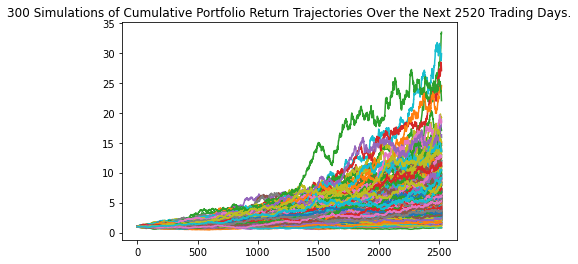

In [67]:
ten_Yr_plots = ten_Yr_returns.plot_simulation()

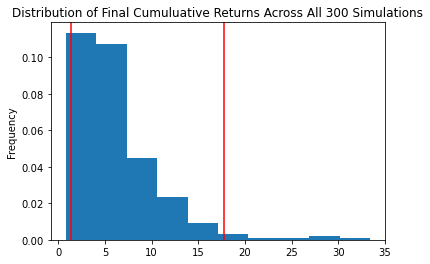

In [68]:
ten_Yr_distribution_plot = ten_Yr_returns.plot_distribution()

In [69]:
ten_Yr_stats = ten_Yr_returns.summarize_cumulative_return()

print(ten_Yr_stats)

count           300.000000
mean              6.308147
std               4.556956
min               0.806205
25%               3.349224
50%               5.327827
75%               7.967625
max              33.411928
95% CI Lower      1.341916
95% CI Upper     17.795441
Name: 2520, dtype: float64


In [70]:
initial_investment = 50000 

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $50,000
ten_Yr_port_high_return = round(initial_investment * all_stats[9],2) 
ten_Yr_port_low_return = round(initial_investment * all_stats[8],2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ten_Yr_port_low_return} and ${ten_Yr_port_high_return}")

There is a 95% chance that an initial investment of $50000 in the portfolio over the next 5 years will end within in the range of $468680.46 and $11835705.4
